In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose


df = pd.read_csv(r'D:\demand_forecasting_system\data\merge\merged_store_product.csv')  # replace with your file path
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
df = df.dropna(subset=['order_date', 'quantity'])


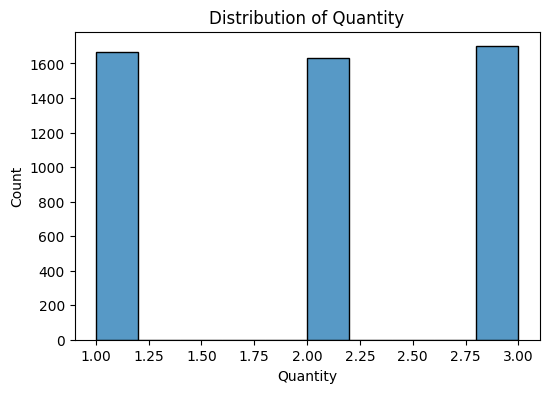

In [2]:
plt.figure(figsize=(6,4))
sns.histplot(df['quantity'], bins=10, kde=False)
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Count')
plt.show()


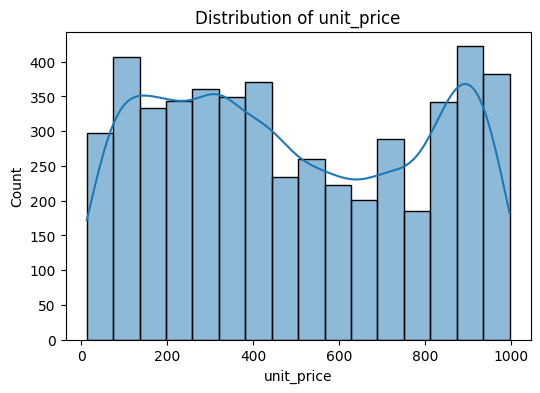

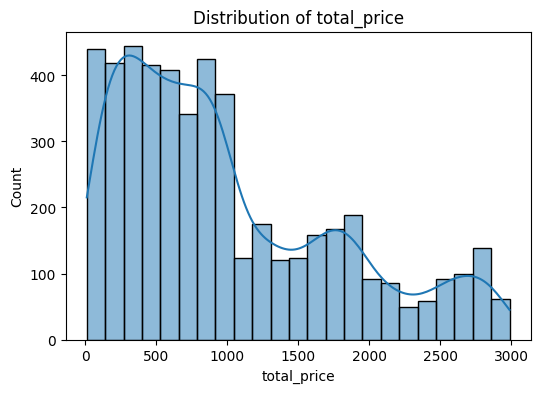

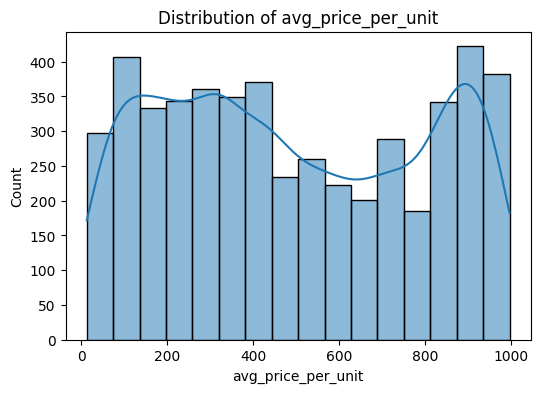

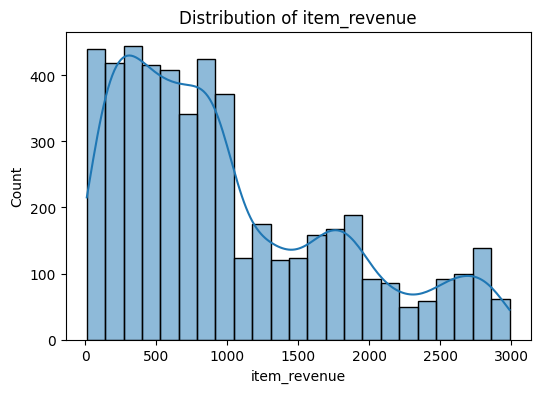

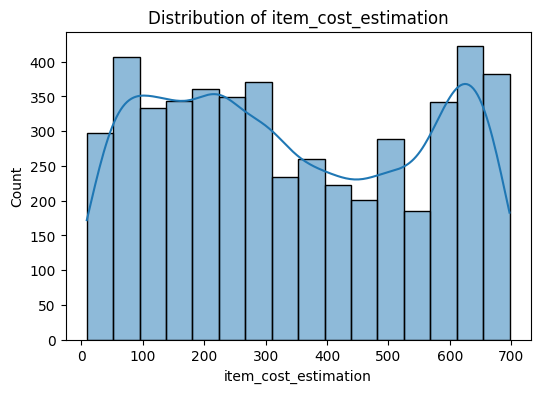

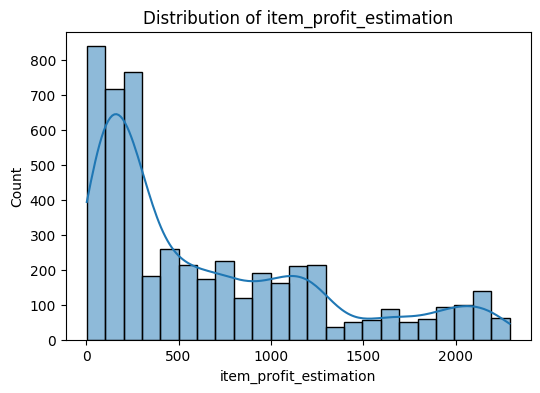

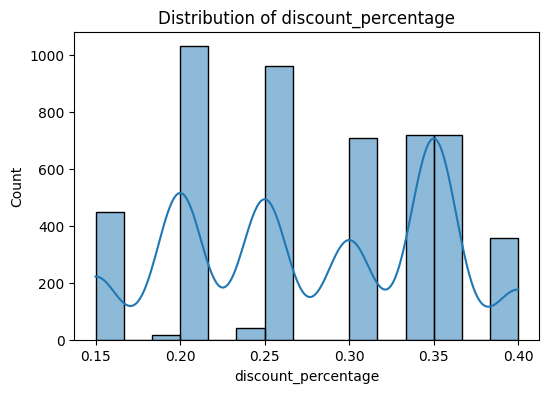

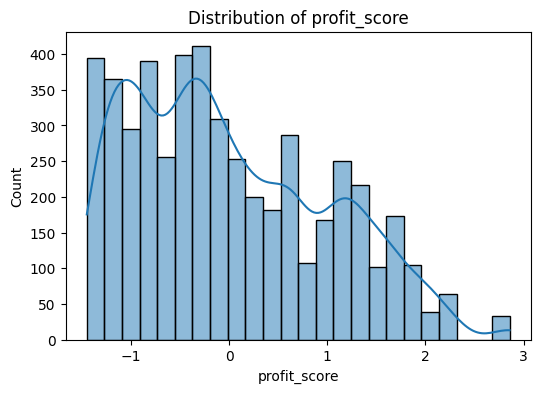

In [ ]:
numeric_cols = ['unit_price', 'total_price', 'avg_price_per_unit', 'item_revenue', 
                'item_cost_estimation', 'item_profit_estimation', 'discount_percentage', 'profit_score']

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


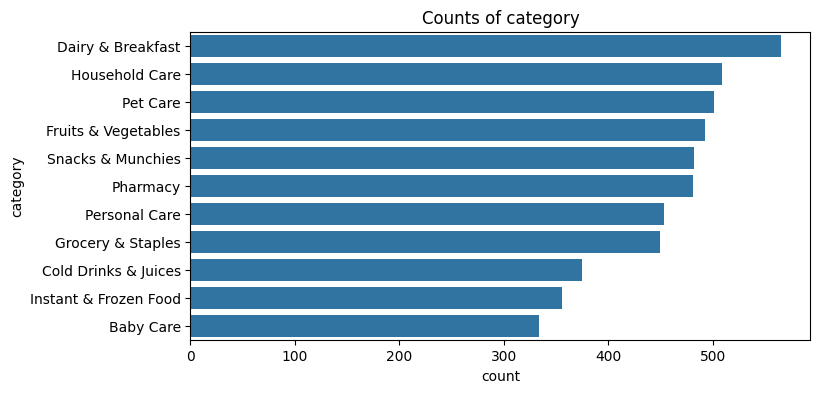

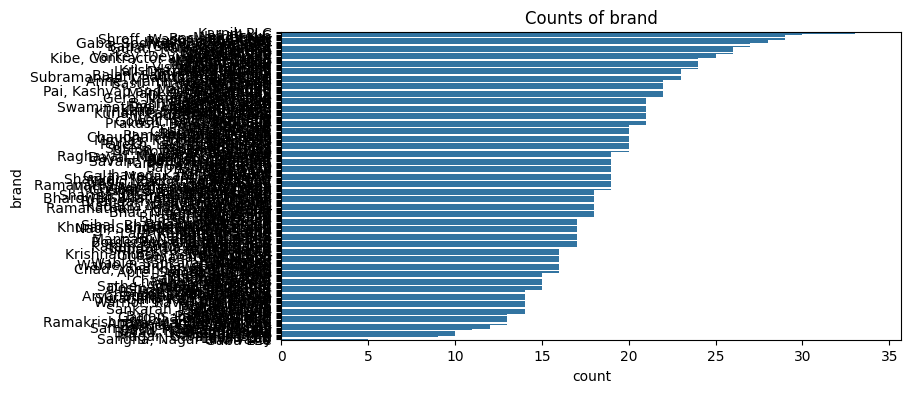

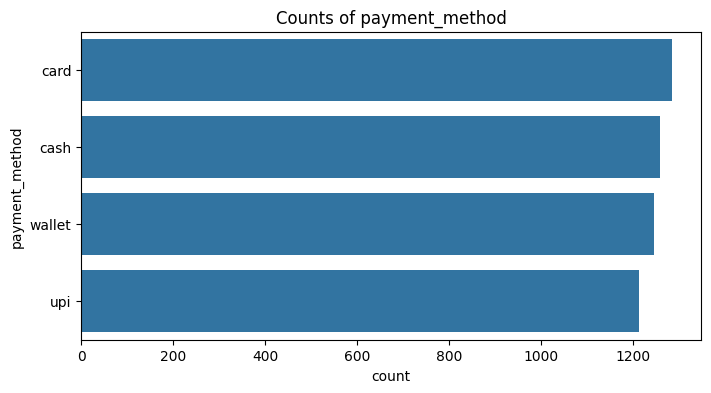

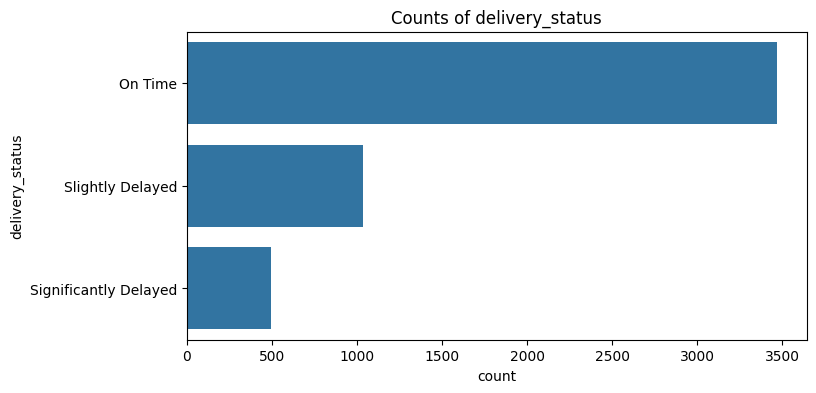

In [4]:


categorical_cols = ['category', 'brand', 'payment_method', 'delivery_status']
for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f'Counts of {col}')
    plt.show()



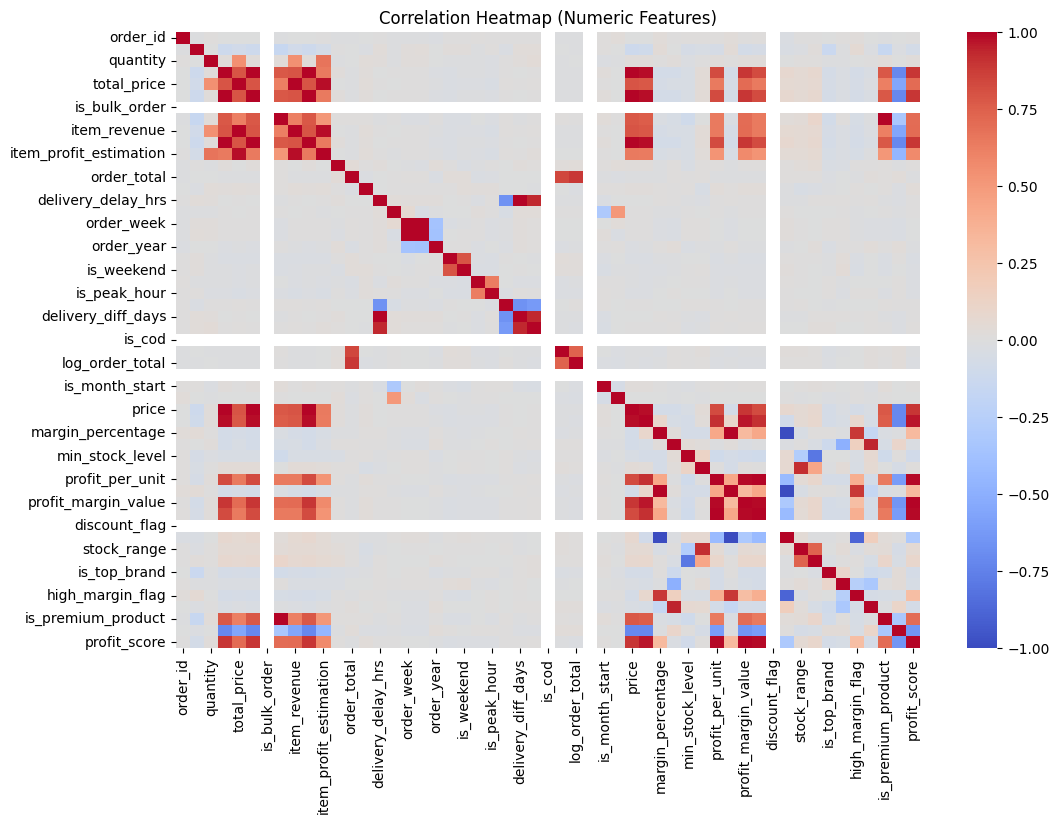

In [5]:

numeric_df = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), cmap='coolwarm', center=0)
plt.title('Correlation Heatmap (Numeric Features)')
plt.show()


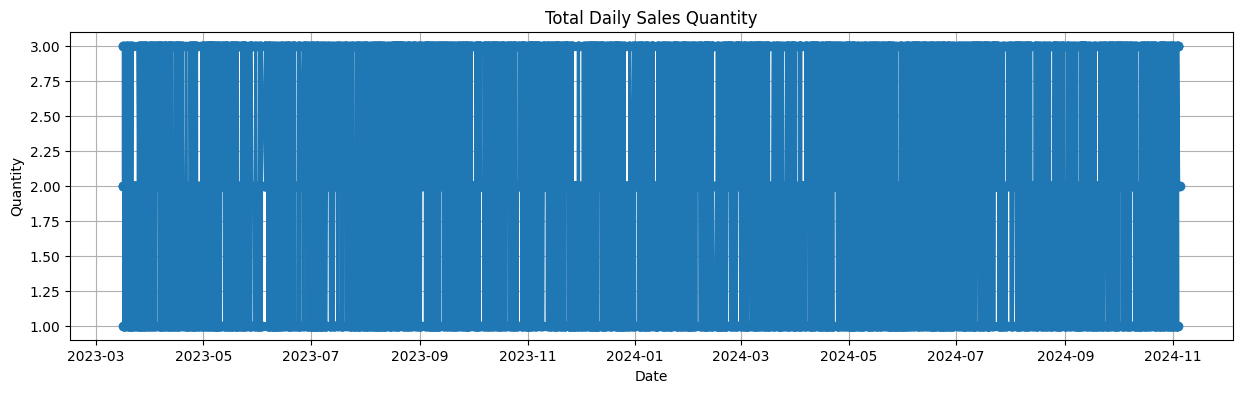

In [6]:

# Total daily sales
daily_sales = df.groupby('order_date')['quantity'].sum()
plt.figure(figsize=(15,4))
plt.plot(daily_sales, marker='o')
plt.title('Total Daily Sales Quantity')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.grid(True)
plt.show()



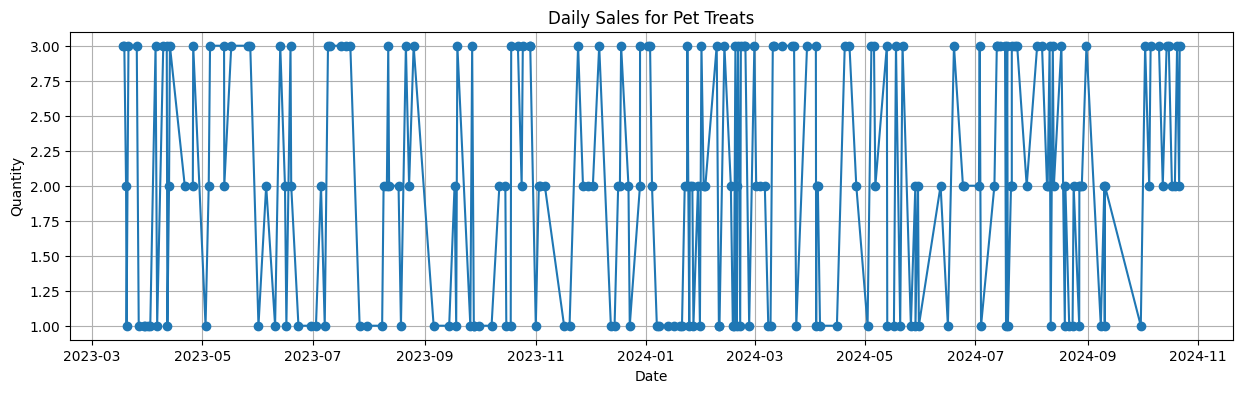

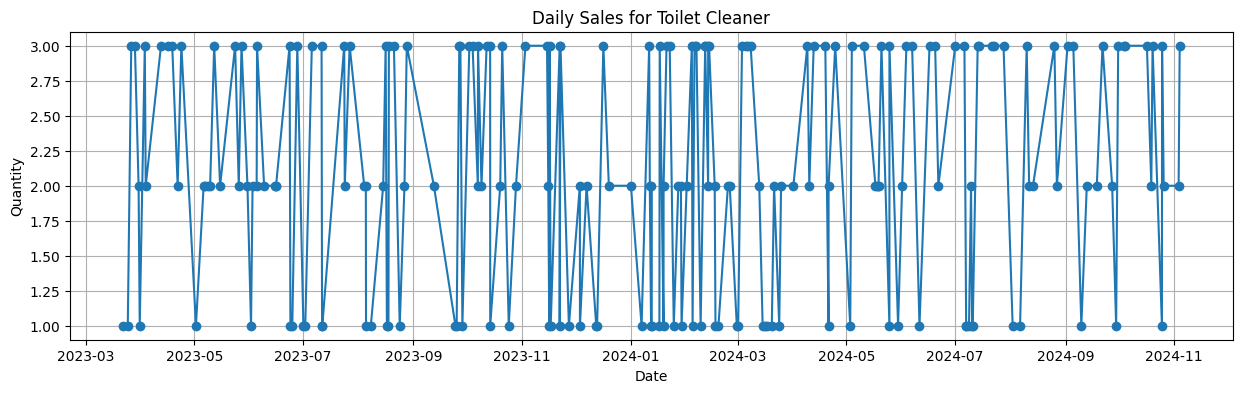

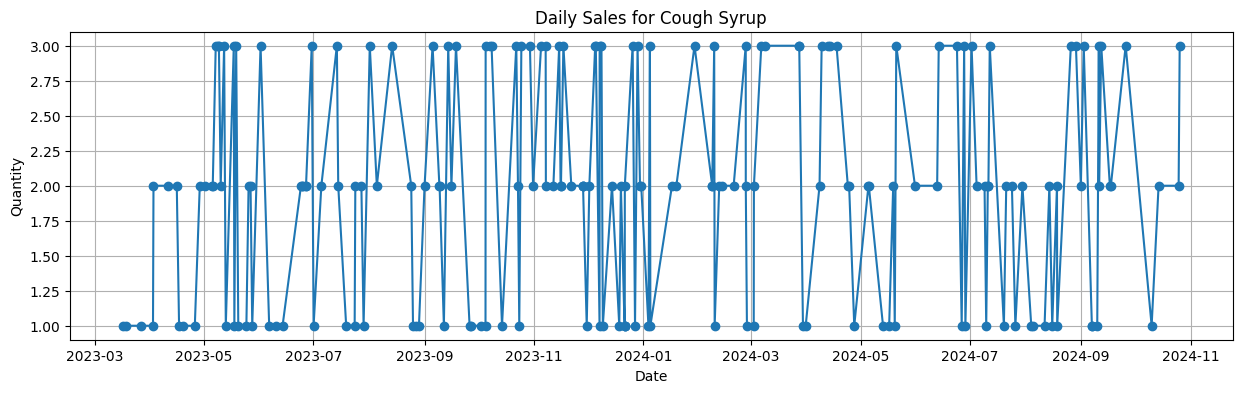

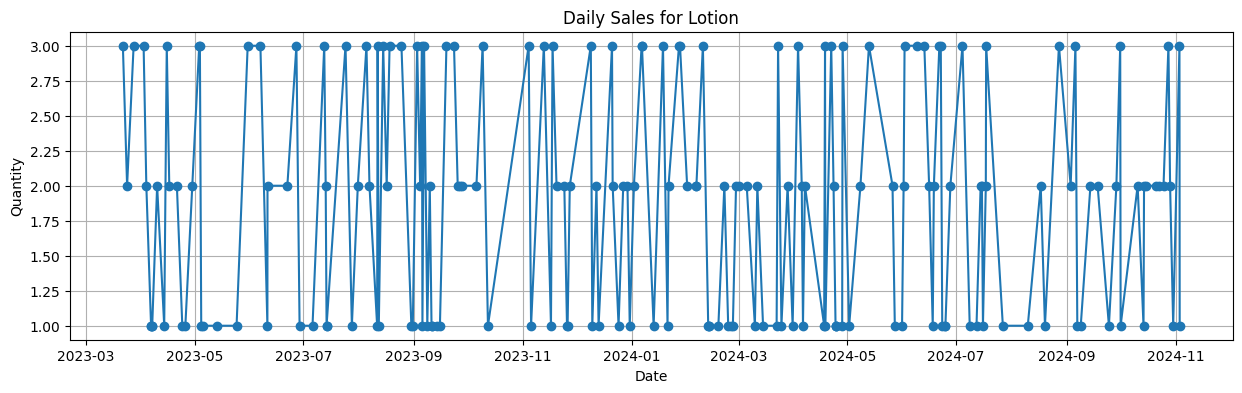

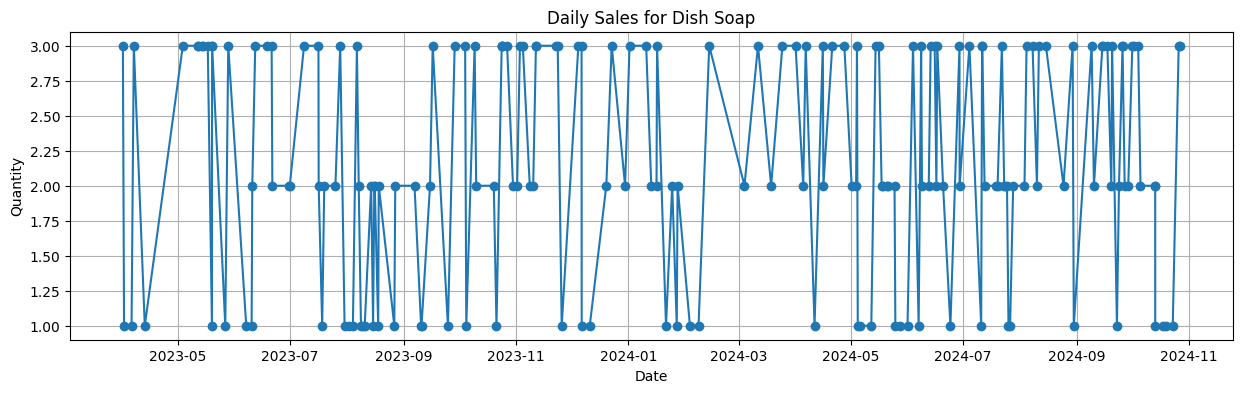

In [ ]:

top_products = df['product_name'].value_counts().head(5).index
for product in top_products:
    prod_sales = df[df['product_name']==product].groupby('order_date')['quantity'].sum()
    plt.figure(figsize=(15,4))
    plt.plot(prod_sales, marker='o')
    plt.title(f'Daily Sales for {product}')
    plt.xlabel('Date')
    plt.ylabel('Quantity')
    plt.grid(True)
    plt.show()


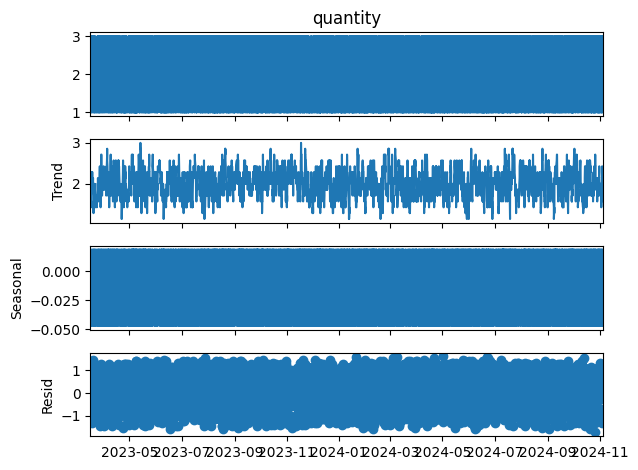

In [ ]:

# Aggregate all sales for decomposition
decomposition = seasonal_decompose(daily_sales, model='additive', period=7)
decomposition.plot()
plt.show()